In [1]:
#reference : https://youtu.be/tFNJGim3FXw

# Install and import dependencies

In [1]:
!pip install torch==1.8.2 torchvision==0.9.2 torchaudio===0.8.2 --extra-index-url https://download.pytorch.org/whl/lts/1.8/cu111

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/lts/1.8/cu111
  Using cached https://download.pytorch.org/whl/lts/1.8/cu111/torch-1.8.2%2Bcu111-cp38-cp38-win_amd64.whl (3057.4 MB)
  Using cached https://download.pytorch.org/whl/lts/1.8/cu111/torchvision-0.9.2%2Bcu111-cp38-cp38-win_amd64.whl (1.9 MB)
  Using cached https://download.pytorch.org/whl/lts/1.8/torchaudio-0.8.2-cp38-none-win_amd64.whl (109 kB)


In [1]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [2]:
!cd yolov5 & pip install -r requirements.txt

  Using cached thop-0.0.31.post2005241907-py3-none-any.whl (8.7 kB)


In [3]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
from PIL import Image

# Load Model

In [4]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\34346/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-6-3 Python-3.8.8 torch-1.8.2+cu111 CUDA:0 (NVIDIA GeForce GTX 1050, 4096MiB)



  0%|          | 0.00/14.1M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.5 GFLOPs
Adding AutoShape... 


In [5]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

# make detections

In [6]:
path = './dataset/usagi.jpg'
image_pil = Image.open(path)
img = np.array(image_pil)

In [7]:
results = model(img)
results.print()

image 1/1: 598x592 1 person
Speed: 9.0ms pre-process, 63.4ms inference, 10.6ms NMS per image at shape (1, 3, 640, 640)


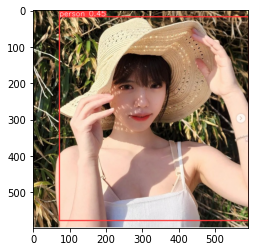

In [8]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [23]:
results.xywh

[tensor([[3.32172e+02, 2.98072e+02, 5.19656e+02, 5.59584e+02, 4.45542e-01, 0.00000e+00]], device='cuda:0')]

# real time detections

In [4]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# train from scratch

In [9]:
import uuid   # Unique identifier
import os
import time

## 이미지를 직접 만드는 과정

In [6]:
IMAGES_PATH = os.path.join('data', 'images') # == /data/images
labels = ['awake', 'drowsy']
number_imgs = 5

In [9]:
cap = cv2.VideoCapture(0)
#Loop through Labels
for label in labels:
    print('Collecting images for {}'.format(labels))
    time.sleep(5)
    
    #Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number{}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [10]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data\images\awake.a906f95b-e248-11ec-8238-70c94e621076.jpg


In [17]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

dataset\awake.5b4ca076-e268-11ec-97ce-70c94e621076.jpg
dataset\awake.5b4ca077-e268-11ec-a9fc-70c94e621076.jpg
dataset\awake.5b4ca078-e268-11ec-a596-70c94e621076.jpg
dataset\awake.5b4ca079-e268-11ec-ba7f-70c94e621076.jpg
dataset\awake.5b4ca07a-e268-11ec-912d-70c94e621076.jpg
dataset\drowsy.5b4ca07b-e268-11ec-bb69-70c94e621076.jpg
dataset\drowsy.5b4ca07c-e268-11ec-85e3-70c94e621076.jpg
dataset\drowsy.5b4ca07d-e268-11ec-9bef-70c94e621076.jpg
dataset\drowsy.5b4ca07e-e268-11ec-a672-70c94e621076.jpg
dataset\drowsy.5b4ca07f-e268-11ec-a6eb-70c94e621076.jpg


In [1]:
!git clone https://github.com/shanata/django_yolo_api

Cloning into 'django_yolo_api'...


In [10]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...


In [11]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

  Using cached lxml-4.9.0-cp38-cp38-win_amd64.whl (3.6 MB)
  Attempting uninstall: lxml
    Found existing installation: lxml 4.6.3
    Uninstalling lxml-4.6.3:
      Successfully uninstalled lxml-4.6.3


In [12]:
!cd yolov5 && python train.py --img 320 --batch 100 --epochs 1 --data dataset.yaml --weights yolov5s.pt --workers 2

Traceback (most recent call last):
  File "train.py", line 26, in <module>
    import torch
  File "C:\ProgramData\Anaconda3\lib\site-packages\torch\__init__.py", line 123, in <module>
    raise err
OSError: [WinError 1455] 이 작업을 완료하기 위한 페이징 파일이 너무 작습니다. Error loading "C:\ProgramData\Anaconda3\lib\site-packages\torch\lib\caffe2_detectron_ops_gpu.dll" or one of its dependencies.


# load model

In [10]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp15/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\34346/.cache\torch\hub\master.zip
YOLOv5  2022-6-3 Python-3.8.8 torch-1.8.2+cu111 CUDA:0 (NVIDIA GeForce GTX 1050, 4096MiB)



Exception: [Errno 2] No such file or directory: 'yolov5\\runs\\train\\exp15\\weights\\last.pt'. Cache may be out of date, try `force_reload=True` or see https://github.com/ultralytics/yolov5/issues/36 for help.

In [ ]:
img = os.path.join('dataset', 'usagi.jpg')

In [ ]:
results = model(img)

In [ ]:
results.print()

In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()